In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re

In [44]:
def load_model_results(path:str,model_name:str):
    U=pd.read_csv(path,names=["training_loss","training_accuracy","test_loss","test_accuracy"])
    U["model"]=model_name
    U.dropna(inplace=True)
    U["epoch"]=[i+1 for i in range(U.shape[0])]
    return U



In [45]:
U=[]
for fileName in os.listdir("results/MNIST"):
    match=re.match("([A-Za-z0-9-+]+)-Results-MNIST.csv",fileName)
    if match:
        U.append(load_model_results(f"results/MNIST/{fileName}",match.group(1)))

results=pd.concat(U,axis=0,ignore_index=True)
results.dropna(inplace=True)

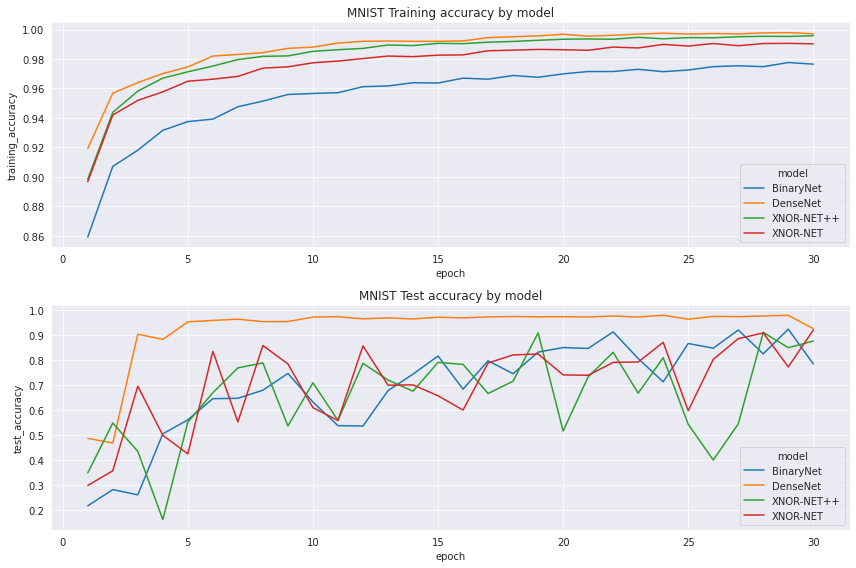

In [56]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
sns.lineplot(data=results,x="epoch",y="training_accuracy",hue="model",ax=ax1)
ax1.set_title("MNIST Training accuracy by model")
sns.lineplot(data=results,x="epoch",y="test_accuracy",hue="model",ax=ax2)
ax2.set_title("MNIST Test accuracy by model")
fig.tight_layout()
fig.savefig("local/MNIST.svg")

,training_loss,training_accuracy,test_loss,test_accuracy,model
0,7.2176,0.8592,76.9503,0.2175,BinaryNet
1,4.2002,0.9071,63.0004,0.2823,BinaryNet
2,3.6045,0.9181,53.0516,0.2613,BinaryNet
3,2.7595,0.9316,39.3811,0.5048,BinaryNet
4,2.5199,0.9375,18.5985,0.5610,BinaryNet
...,...,...,...,...,...
116,0.0322,0.9905,1.1974,0.8024,XNOR-NET
117,0.0359,0.9890,0.6024,0.8853,XNOR-NET
118,0.0294,0.9905,0.5162,0.9079,XNOR-NET
119,0.0303,0.9906,1.2792,0.7724,XNOR-NET
